## Gradient Descent And Normal Equation With Feature Scaling

In [3]:
import pandas as pd
import numpy as np
import sklearn.datasets as Datasets
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
def fitNormalEquation(X_train,Y_train):
    #theta = (X.T * X).inv * X.T * Y_train
    X_train = np.c_[np.ones(len(X_train)),X_train]
    a = np.matmul(X_train.T,X_train)
    inverse = np.linalg.pinv(a)
    b = np.matmul(inverse,X_train.T)
    theta = np.matmul(b,Y_train)
    return theta

In [5]:
def fitGradientDescent(X_train,Y_train,learning_rate=0.001,tolerance=0.0001,max_iterations=1000000): #X_train can be np 2D array
    n,fc = X_train.shape #fc is feature_count, n is no.of training samples
    #Setting x[0] as 1s
    X_train = np.c_[np.ones(n),X_train]
    #Now X_train's shape is (n,fc+1)
    
    #Initializing theta with shape (fc+1,1)
    theta = np.zeros((fc+1,1))
    #print("X shape is ",X_train.shape)
    #print("theta shape is ",theta.shape)
    
    J_theta = []
    iterations = []
    count = 0
    error_value = (((np.matmul(X_train,theta) - Y_train)*(np.matmul(X_train,theta) - Y_train)).sum()/(2*n))
    delta_error = error_value
    while(delta_error >= tolerance and count <= max_iterations):
        #Updating parameters based on formula and maths
        theta_derivative =  (np.matmul(X_train.T,(np.matmul(X_train,theta) - Y_train)))/n # (fc+1,n)*(n,1) = (fc+1,1)
        theta = theta - theta_derivative*learning_rate
        
        #For plotting curve of error value vs no. of iterations
        J_theta.insert(len(J_theta),error_value) 
        iterations.insert(len(iterations),count)
        
        #Updated error value with new values of parameters and iteration count
        new_error_value = (((np.matmul(X_train,theta) - Y_train)**2).sum()/(2*n))
        delta_error = abs(new_error_value - error_value)
        error_value = new_error_value
        count = count + 1
        
    print("Stopped after",count,"iterations")
    style.use('ggplot')
    plt.plot(iterations,J_theta)
    plt.xlabel("No. Of Iterations")
    plt.ylabel("Value Of Squared Error Function")
    plt.title("Error Value Vs Iterations")
    plt.show() #Should be decreasing for checking correct movement of gradient descent
    return theta

In [6]:
def predict(X_test,theta):
    X_test = np.c_[np.ones(X_test.shape[0]),X_test]
    return np.matmul(X_test,theta)

In [7]:
def score(Y_true,Y_predicted):
    nr = ((Y_true - Y_predicted)*(Y_true-Y_predicted)).sum()
    dr = ((Y_true - Y_true.mean())*(Y_true-Y_true.mean())).sum()
    result = 1 - (nr/dr)
    return result

In [8]:
def scaledCopy(ndarray):
    df_scaled = ndarray.copy()
    for i in range(df_scaled.shape[-1]):
        df_scaled[:,i] = df_scaled[:,i]/df_scaled[:,i].max()
    return df_scaled

In [9]:
def meanScaledCopy(ndarray):
    df_scaled = ndarray.copy()
    for i in range(df_scaled.shape[-1]):
        df_scaled[:,i] = (df_scaled[:,i]-df_scaled[:,i].mean())/df_scaled[:,i].std()
    return df_scaled

## Testing Boston Dataset

In [10]:
boston = Datasets.load_boston()
df = pd.DataFrame(boston.data)

In [11]:
X = df.values
Y = boston.target

In [12]:
X_test, X_train, Y_test, Y_train = cv.train_test_split(X,Y,test_size=0.3,random_state=0)

In [13]:
X_test_scaled = scaledCopy(X_test)
X_train_scaled = scaledCopy(X_train)

In [14]:
X_test_mean_scaled = meanScaledCopy(X_test)
X_train_mean_scaled = meanScaledCopy(X_train)

Score for Unscaled DF Normal Equation =  0.718281521183
Stopped after 594273 iterations


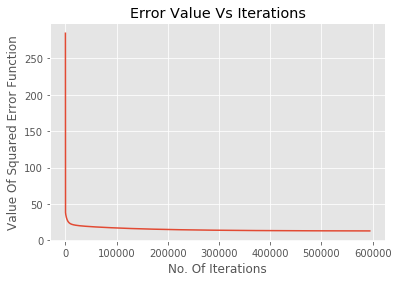

Score for Unscaled Gradient Descent =  0.670828957856


In [15]:
theta = fitNormalEquation(X_train,Y_train.reshape(len(Y_train),1))
Y_predicted = predict(X_test,theta)
print("Score for Unscaled DF Normal Equation = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))
theta = fitGradientDescent(X_train,Y_train.reshape(len(Y_train),1),learning_rate=0.000006,max_iterations=1000000,tolerance=0.000001)
Y_predicted = predict(X_test,theta)
print("Score for Unscaled Gradient Descent = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))

Score for Scaled DF Normal Equation =  0.704466116202
Stopped after 4108 iterations


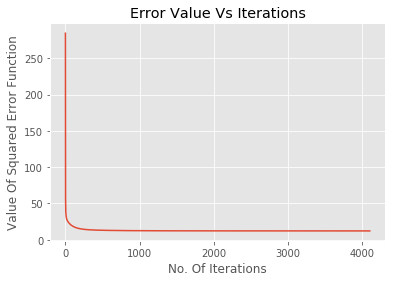

Score for Scaled Gradient Descent =  0.701690797817


In [16]:
theta = fitNormalEquation(X_train_scaled,Y_train.reshape(len(Y_train),1))
Y_predicted = predict(X_test_scaled,theta)
print("Score for Scaled DF Normal Equation = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))
#Reduce tolerance and increase iterations to reach near to normal equation results
#Now we can increase learning rate as it won't cause integer overflow while multiplications because of feature scaling
theta = fitGradientDescent(X_train_scaled,Y_train.reshape(len(Y_train),1),learning_rate=0.3,max_iterations=1000000,tolerance=0.00001)
Y_predicted = predict(X_test_scaled,theta)
print("Score for Scaled Gradient Descent = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))

Score for Mean Scaled DF Normal Equation =  0.701057866633
Stopped after 206 iterations


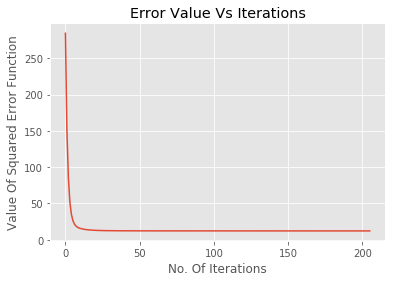

Score for Mean Scaled Gradient Descent =  0.701147376387


In [17]:
theta = fitNormalEquation(X_train_mean_scaled,Y_train.reshape(len(Y_train),1))
Y_predicted = predict(X_test_mean_scaled,theta)
print("Score for Mean Scaled DF Normal Equation = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))
#Reduce tolerance and increase iterations to reach near to normal equation results
#Now we can increase learning rate as it won't cause integer overflow while multiplications because of feature scaling
theta = fitGradientDescent(X_train_mean_scaled,Y_train.reshape(len(Y_train),1),learning_rate=0.3,max_iterations=1000000,tolerance=0.00001)
Y_predicted = predict(X_test_mean_scaled,theta)
print("Score for Mean Scaled Gradient Descent = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))

## Testing L3 HW Dataset 

In [18]:
test_data = pd.read_excel(r"../data/L3_homework/test.xlsx")
train_data = pd.read_excel(r"../data/L3_homework/train.xlsx")
X_train = train_data.iloc[:,:-1].values
Y_train = train_data.iloc[:,-1].values
X_test = test_data.iloc[:,:-1].values
Y_test = test_data.iloc[:,-1].values

In [19]:
X_test_scaled = scaledCopy(X_test)
X_train_scaled = scaledCopy(X_train)

In [20]:
X_test_mean_scaled = meanScaledCopy(X_test)
X_train_mean_scaled = meanScaledCopy(X_train)

Score for Unscaled DF Normal Equation =  0.928405985545
Stopped after 417584 iterations


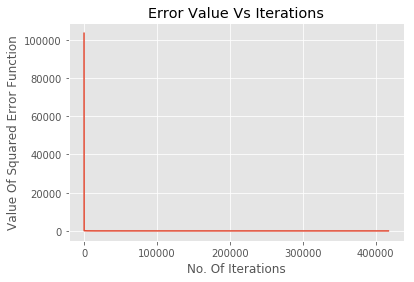

Score for Unscaled Gradient Descent =  0.911752872789


In [22]:
theta = fitNormalEquation(X_train,Y_train.reshape(len(Y_train),1))
Y_predicted = predict(X_test,theta)
print("Score for Unscaled DF Normal Equation = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))
theta = fitGradientDescent(X_train,Y_train.reshape(len(Y_train),1),learning_rate=0.0000006,max_iterations=1000000,tolerance=0.000001)
Y_predicted = predict(X_test,theta)
print("Score for Unscaled Gradient Descent = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))

Score for Scaled DF Normal Equation =  0.921128093159
Stopped after 3253 iterations


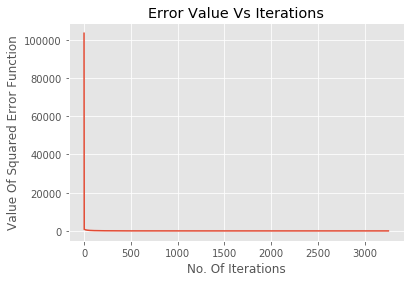

Score for Scaled Gradient Descent =  0.919741100782


In [23]:
theta = fitNormalEquation(X_train_scaled,Y_train.reshape(len(Y_train),1))
Y_predicted = predict(X_test_scaled,theta)
print("Score for Scaled DF Normal Equation = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))
#Reduce tolerance and increase iterations to reach near to normal equation results
#Now we can increase learning rate as it won't cause integer overflow while multiplications because of feature scaling
theta = fitGradientDescent(X_train_scaled,Y_train.reshape(len(Y_train),1),learning_rate=0.3,max_iterations=1000000,tolerance=0.00001)
Y_predicted = predict(X_test_scaled,theta)
print("Score for Scaled Gradient Descent = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))

Score for Mean Scaled DF Normal Equation =  0.928205523261
Stopped after 166 iterations


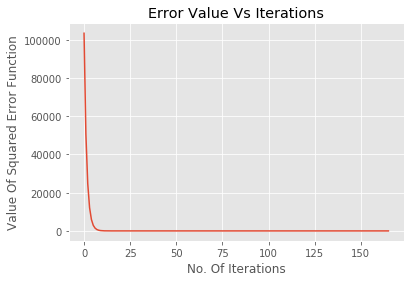

Score for Mean Scaled Gradient Descent =  0.928184664888


In [24]:
theta = fitNormalEquation(X_train_mean_scaled,Y_train.reshape(len(Y_train),1))
Y_predicted = predict(X_test_mean_scaled,theta)
print("Score for Mean Scaled DF Normal Equation = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))
#Reduce tolerance and increase iterations to reach near to normal equation results
#Now we can increase learning rate as it won't cause integer overflow while multiplications because of feature scaling
theta = fitGradientDescent(X_train_mean_scaled,Y_train.reshape(len(Y_train),1),learning_rate=0.3,max_iterations=1000000,tolerance=0.00001)
Y_predicted = predict(X_test_mean_scaled,theta)
print("Score for Mean Scaled Gradient Descent = ",score(Y_test,Y_predicted.reshape(len(Y_predicted))))